# TODO (2022-08-28): Talk about the representation
- NxNx3 + boundary
- symmetries
- tools

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import aegomoku.tools as gt
from aegomoku.utils import analyse_board
from aegomoku.policies.heuristic_policy import HeuristicPolicy
from aegomoku.gomoku_board import GomokuBoard

In [3]:
BOARD_SIZE = 15

In [4]:
stones = "C11F9E9G8F7G7G9H8I8H7I6I9F6H6H9I5J4"

2022-08-28 11:32:16.725615: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-28 11:32:16.726293: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-28 11:32:16.731878: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-28 11:32:16.732606: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-28 11:32:16.733518: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from S

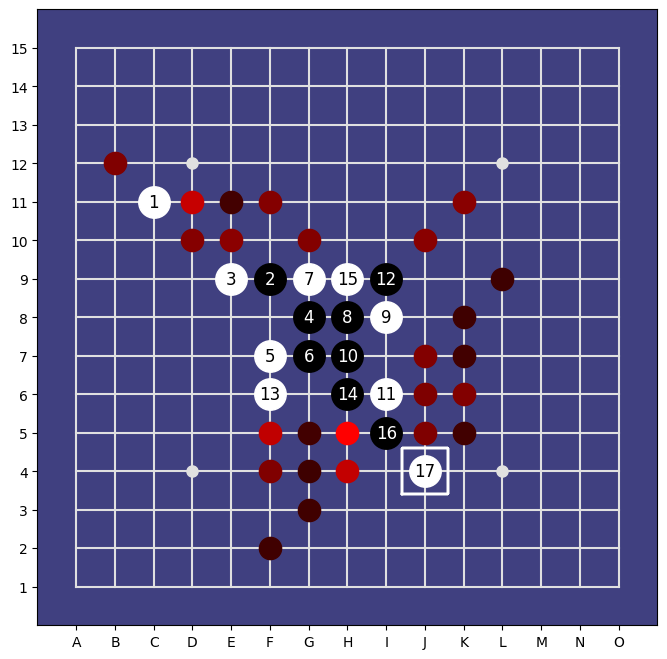

In [5]:
policy = HeuristicPolicy(BOARD_SIZE)
analyse_board(BOARD_SIZE, stones, policy)

In [7]:
board = GomokuBoard(BOARD_SIZE, stones)
Move = board.Stone

# Symmetries
The board, together with the resulting probabilities can be rotated or flipped to produce just another valid training example. In total, we 8-fold our training data.

In [55]:
math_rep = board.canonical_representation()
symmetries = gomoku.get_symmetries(math_rep, probs)
symmetries[0][0].shape

(17, 17, 3)

We see the board diagonally flipped

In [56]:
gt.print_channels(symmetries[0][0])

shape: (17, 17, 3)
[[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 3]
 [3 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 2 0 2 0 0 0 0 1 0 0 0 0 0 3]
 [3 0 0 1 0 2 2 0 1 0 2 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]]


In [57]:
for i in range(1):
    print((np.array(symmetries[i][1]).reshape(15, 15) * 100).astype(int))
    print()

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 43  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 52  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]

